In [1]:
from pathlib import Path
import pandas as pd
import utils
import matplotlib.pyplot as plt


Bad key savefig.frameon in file /home/camilla/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 421 ('savefig.frameon : True')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.level in file /home/camilla/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 472 ('verbose.level  : silent      # one of silent, helpful, debug, debug-annoying')
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.4.2/matplotlibrc.template
or from the matplotlib source distribution

Bad key verbose.fileo in file /home/camilla/anaconda3/lib/python3.7/site-packages/matplotlib/mpl-data/stylelib/_classic_test.mplstyle, line 473 ('verbose.fileo  : sys.stdout  # a log filename, sys.stdout or sys.stderr')
You probably need to get 

In [2]:
data = utils.get_aws_val_df()

In [8]:
data

,Unnamed: 0,file,age,gender,race,service_test,path,predicted_age,predicted_gender
0,0,val/1.jpg,3-9,male,East Asian,False,val/1.jpg,7.0,male
1,1,val/2.jpg,50-59,female,East Asian,True,val/2.jpg,38.0,female
2,2,val/3.jpg,30-39,male,White,True,val/3.jpg,31.0,male
3,3,val/4.jpg,20-29,female,Latino_Hispanic,True,val/4.jpg,24.0,female
4,4,val/5.jpg,20-29,male,Southeast Asian,False,val/5.jpg,21.0,male
5,5,val/6.jpg,30-39,male,Latino_Hispanic,False,val/6.jpg,38.0,male
6,6,val/7.jpg,20-29,male,Black,True,val/7.jpg,23.0,male
7,7,val/8.jpg,3-9,male,East Asian,False,val/8.jpg,3.0,male
8,8,val/9.jpg,20-29,male,Southeast Asian,False,val/9.jpg,NaN,NaN
9,9,val/10.jpg,3-9,male,Southeast Asian,False,val/10.jpg,14.0,male


In [3]:
data.gender[data.gender == 'Female'] = 'female'
data.gender[data.gender == 'Male'] = 'male'

/home/camilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/home/camilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
droped_data = data.dropna(inplace = False)
droped_data.gender[droped_data.gender == 'Female'] = 'female'
droped_data.gender[droped_data.gender == 'Male'] = 'male'

/home/camilla/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/camilla/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:8682: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
/home/camilla/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3331: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
/home/camilla/anacond

In [5]:
nan_data = data[data.predicted_gender.isna()]
len(nan_data)

1942

In [6]:
(nan_data.gender == 'female').sum()

777

In [7]:
(nan_data.gender == 'male').sum()

1165

## Disparate impact

In [8]:
def calc_prop_priv(data, group_col, group, output_col, output_val):
    new = data[data[group_col] == group]
    return len(new[new[output_col] == output_val])/len(new)

def calc_prop_unpriv(data, group_col, group, output_col, output_val):
    new = data[data[group_col] == group]
    return len(new[new[output_col] != output_val])/len(new)


(array([5792.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        5162.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

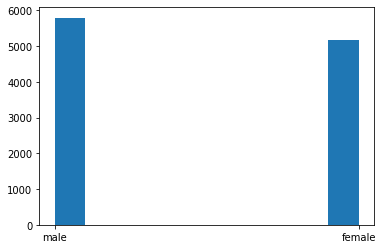

In [9]:
plt.hist(data.gender)
# plt.xticks(rotation = 0)

####  Disparate impact male for gender

In [10]:
pr_priv = calc_prop_priv(data, "gender", 'male', "predicted_gender", "male")
print(pr_priv)
pr_unpriv = calc_prop_unpriv(data, "gender", 'male', "predicted_gender", "male")
print(pr_unpriv)
pr_unpriv / pr_priv

0.7260013812154696
0.2739986187845304


0.37740784780023784

In [11]:
pr_priv = calc_prop_priv(droped_data, "gender", 'male', "predicted_gender", "male")
print(pr_priv)
pr_unpriv = calc_prop_unpriv(droped_data, "gender", 'male', "predicted_gender", "male")
print(pr_unpriv)
pr_unpriv / pr_priv

0.9087961962394641
0.09120380376053598


0.10035671819262781

####  Disparate impact female for gender

In [12]:
pr_priv = calc_prop_priv(data, "gender", 'female', "predicted_gender", "female")
print(pr_priv)
pr_unpriv = calc_prop_unpriv(data, "gender", 'female', "predicted_gender", "female")
print(pr_unpriv)
pr_unpriv / pr_priv

0.8086013173188686
0.19139868268113133


0.23670340201245807

In [13]:
pr_priv = calc_prop_priv(droped_data, "gender", 'female', "predicted_gender", "female")
print(pr_priv)
pr_unpriv = calc_prop_unpriv(droped_data, "gender", 'female', "predicted_gender", "female")
print(pr_unpriv)
pr_unpriv / pr_priv

0.9518814139110604
0.04811858608893957


0.05055103018687111

## Equality of odds

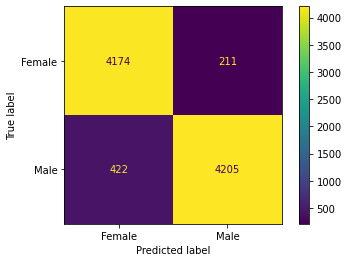

In [22]:
y_true = droped_data.gender
y_preds = droped_data.predicted_gender

cm = confusion_matrix(y_true, y_preds)
cmd = ConfusionMatrixDisplay(cm, display_labels=['Female','Male'])
cmd.plot()

In [23]:
def perf_measure(y_actual, y_hat, prv, unprv):
    TP = 0
    FP = 0
    TN = 0
    FN = 0

    for i in range(len(y_hat)): 
        if y_actual[i]==y_hat[i]==prv:
           TP += 1
        if y_hat[i]==prv and y_actual[i]!=y_hat[i]:
           FP += 1
        if y_actual[i]==y_hat[i]==unprv:
           TN += 1
        if y_hat[i]==unprv and y_actual[i]!=y_hat[i]:
           FN += 1
    FN += (data.predicted_gender[data.gender == prv].isna()).sum()

    return TP, FP, TN, FN 

In [24]:
def Equality_of_odds(y_actual, y_hat, prv, unprv):
    TP, FP, TN, FN = perf_measure(y_actual, y_hat, prv, unprv)
    FPR = FP/(FP+TN)
    FNR = FN/(FN+TP)
    TPR = TP/(TP+FN)
    TNR = TN/(TN+FP)
    
    return FPR,FNR, TPR,TNR

In [25]:
y_actual = data.gender#data.gender[data.gender == 'male'].to_list()
y_hat = data.predicted_gender# data.predicted_gender[data.gender == 'male'].to_list()

In [26]:
perf_measure(y_actual, y_hat, 'female', 'male')

(4174, 422, 4205, 988)

In [27]:
perf_measure(y_actual, y_hat, 'male', 'female')

(4205, 211, 4174, 1587)

In [28]:
FPR, FNR, TPR, TNR = Equality_of_odds(y_actual, y_hat, 'female', 'male')
print(f'True positive rate: {TPR:.4}, false positive rate: {FNR:.4} for Females')

True positive rate: 0.8086, false positive rate: 0.1914 for Females


In [29]:
FPR, FNR, TPR, TNR = Equality_of_odds(y_actual, y_hat, 'male', 'female')
print(f'True positive rate: {TPR:.4}, false positive rate: {FNR:.4} for Males')

True positive rate: 0.726, false positive rate: 0.274 for Males


## Equality of opportunity difference

In [30]:
def opp_diff(y_actual, y_hat, prv, unprv):
    TP, FP, TN, FN = perf_measure(y_actual, y_hat, prv, unprv)
    FNR = FN/(FN+TP)
    TPR = TP/(TP+FN)
    
    return TPR

In [31]:
_, _, male_TPR, _ = Equality_of_odds(y_actual, y_hat, 'male', 'female')

In [32]:
_, _, female_TPR, _ = Equality_of_odds(y_actual, y_hat, 'female', 'male')

In [33]:
female_TPR - male_TPR

0.082599936103399

In [34]:
male_TPR

0.7260013812154696

In [35]:
female_TPR

0.8086013173188686